In [79]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro
import scipy.stats as sp

In [2]:
os.chdir(r"C:\Users\Jayant kr. Mishra\Downloads\Exam#Linear Regression using Python")

In [3]:
os.listdir()

['Fish_dataset.csv',
 'Linear Regression using Python_Class Assessment.docx',
 'Linear Regression using Python_Class Assessment.pdf']

In [4]:
fish=pd.read_csv("Fish_dataset.csv")

In [7]:
fish.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [8]:
fish.tail(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [9]:
fish.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [10]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [ ]:
#Univariate Analysis

In [15]:
fish.shape

(159, 7)

In [11]:
fish.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [12]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
#x~x
#X~Y

In [13]:
fish["Species"].describe()

count       159
unique        7
top       Perch
freq         56
Name: Species, dtype: object

In [14]:
fish["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

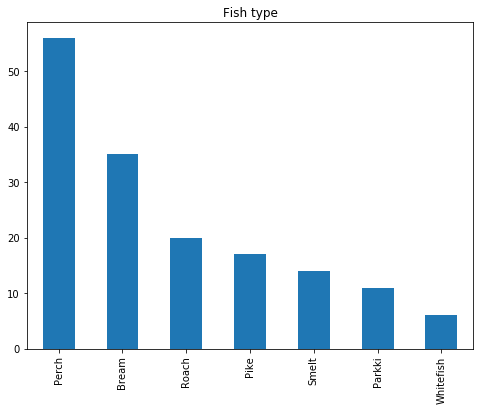

In [35]:
fish["Species"].value_counts().plot(kind="bar",figsize=(8,6),title ="Fish type")
plt.show()


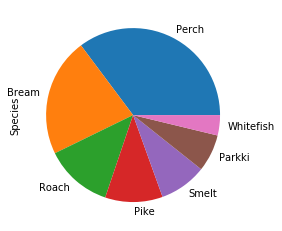

In [19]:
fish["Species"].value_counts().plot(kind="pie")
plt.show()

(array([59., 31., 12., 18., 16., 11.,  8.,  1.,  0.,  3.]),
 array([   0.,  165.,  330.,  495.,  660.,  825.,  990., 1155., 1320.,
        1485., 1650.]),
 <a list of 10 Patch objects>)

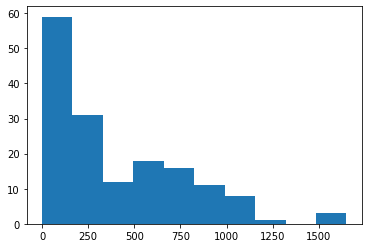

In [25]:
plt.hist(fish.Weight)

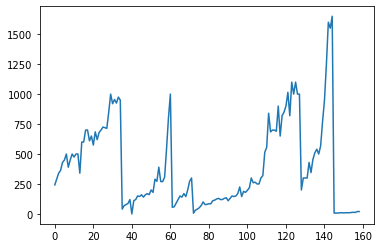

In [26]:
plt.plot(fish.Weight)

In [40]:
fish.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [27]:
fish.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [31]:
fish[["Weight","Height"]].corr()

,Weight,Height
Weight,1.000000,0.724345
Height,0.724345,1.000000


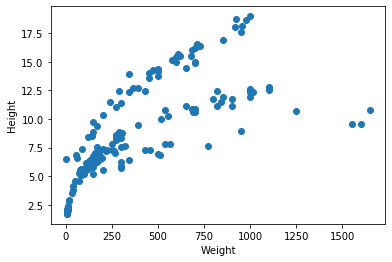

In [38]:
plt.scatter(fish["Weight"],fish["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

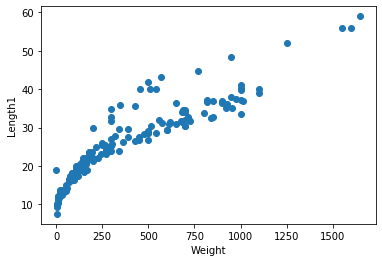

In [41]:
plt.scatter(fish["Weight"],fish["Length1"])
plt.xlabel("Weight")
plt.ylabel("Length1")
plt.show()

In [45]:
fish.groupby(["Species"]).agg({"Length1":["count","min", "max", "mean"],"Height":["count","min", "max", "mean"],"Weight":["count","min", "max", "mean"]})

Length1                        Height                               \
            count   min   max       mean  count      min      max       mean   
Species                                                                        
Bream          35  23.2  38.0  30.305714     35  11.5200  18.9570  15.183211   
Parkki         11  13.5  24.0  18.727273     11   6.5772  11.3680   8.962427   
Perch          56   7.5  41.1  25.735714     56   2.1120  12.8002   7.861870   
Pike           17  30.0  59.0  42.476471     17   5.5680  10.8120   7.713771   
Roach          20  12.9  29.5  20.645000     20   4.1472   9.4850   6.694795   
Smelt          14   9.3  13.8  11.257143     14   1.7284   2.9322   2.209371   
Whitefish       6  23.6  37.3  28.800000      6   8.1454  12.3540  10.027167   

          Weight                             
           count    min     max        mean  
Species                                      
Bream         35  242.0  1000.0  617.828571  
Parkki        11   55.0   300.0  154.818182  
Perch         56    5.9  1100.0  382.239286  
Pike          17  200.0  1650.0  718.705882  
Roach         20    0.0   390.0  152.050000  
Smelt         14    6.7    19.9   11.178571  
Whitefish      6  270.0  1000.0  531.000000

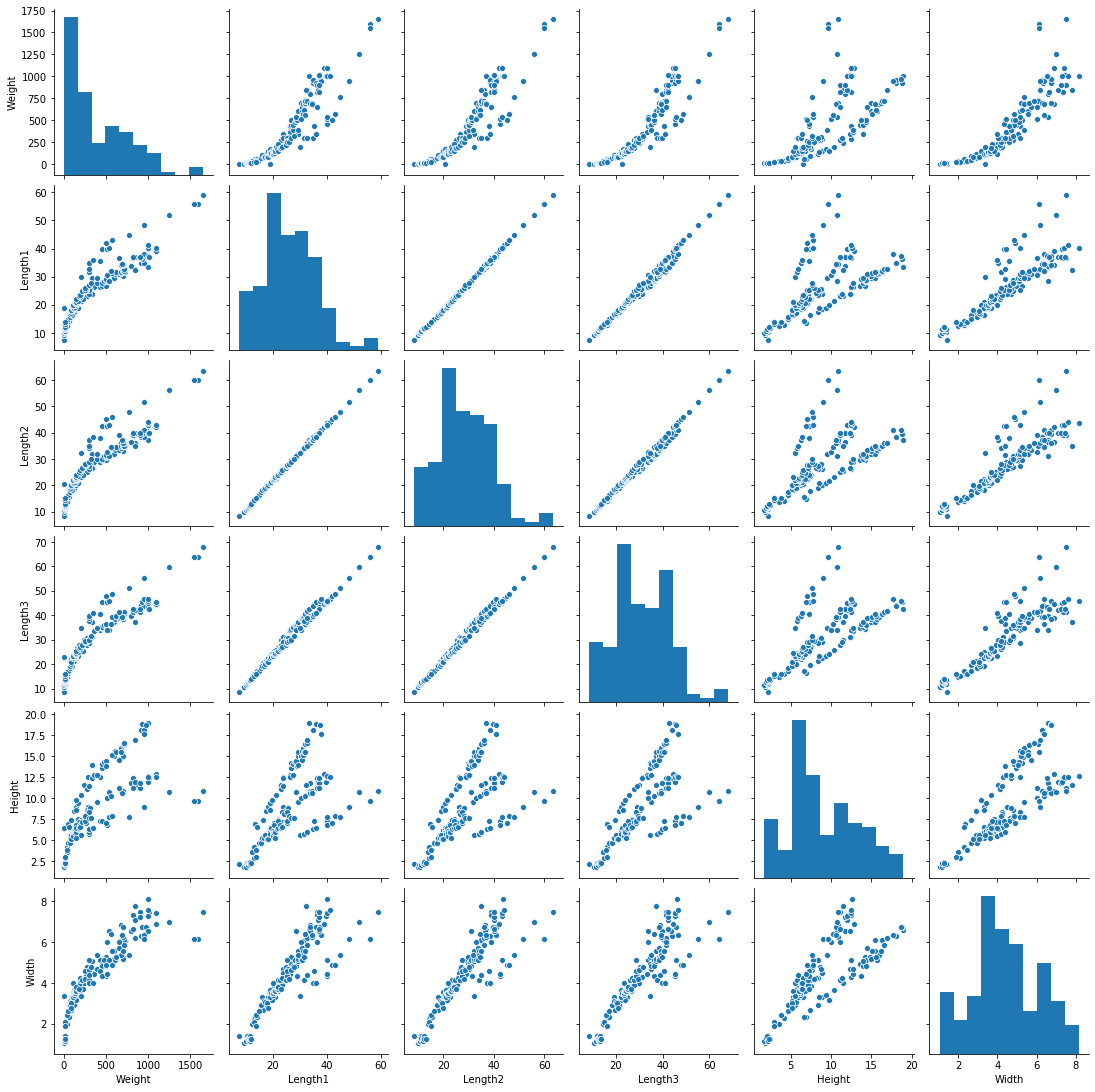

In [39]:
sns.pairplot(fish)

In [49]:
#data types

In [50]:
fish.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [51]:
fish1=pd.get_dummies(fish,columns=["Species"],drop_first=True)
fish1

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,1,0


In [53]:
fish1["Species_Whitefish"].value_counts()

0    153
1      6
Name: Species_Whitefish, dtype: int64

In [56]:
fish1["Species_Parkki"].value_counts()

0    148
1     11
Name: Species_Parkki, dtype: int64

In [55]:
fish1["Species_Perch"].value_counts()

0    103
1     56
Name: Species_Perch, dtype: int64

In [47]:
# Outlier and Missing Value Treatment

In [61]:
fish1.dtypes

Weight               float64
Length1              float64
Length2              float64
Length3              float64
Height               float64
Width                float64
Species_Parkki         uint8
Species_Perch          uint8
Species_Pike           uint8
Species_Roach          uint8
Species_Smelt          uint8
Species_Whitefish      uint8
dtype: object

In [58]:
fish1.shape

(159, 12)

In [60]:
fish1.isnull().sum().sort_values(ascending=False) ## NO missing value

Species_Whitefish    0
Species_Smelt        0
Species_Roach        0
Species_Pike         0
Species_Perch        0
Species_Parkki       0
Width                0
Height               0
Length3              0
Length2              0
Length1              0
Weight               0
dtype: int64

In [63]:
Outliers=fish1.describe(percentiles=[0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.15, 0.25, 0.5, 0.75, 0.90, 0.95, 0.96, 0.97, 0.98, 0.99]).T
Outliers

,count,mean,std,min,1%,2%,3%,4%,5%,10%,...,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Weight,159.0,398.326415,357.978317,0.0000,6.364000,7.080000,8.388000,9.732000,9.80000,29.58000,...,120.00000,273.0000,650.0000,930.0000,1000.00000,1010.200000,1100.000000,1226.000000,1571.000000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,9.706000,10.148000,10.622000,10.960000,11.30000,13.44000,...,19.05000,25.2000,32.7000,38.2000,41.19000,42.816000,45.710000,51.408000,56.000000,59.000
Length2,159.0,28.415723,10.716328,8.4000,10.206000,10.664000,11.148000,11.460000,11.80000,14.62000,...,21.00000,27.3000,35.5000,41.2000,44.10000,45.680000,48.962000,55.312000,60.000000,63.400
Length3,159.0,31.227044,11.610246,8.8000,11.264000,11.664000,12.296000,12.760000,13.10000,16.16000,...,23.15000,29.4000,39.6500,45.3400,46.74000,48.476000,52.214000,58.964000,64.000000,68.000
Height,159.0,8.970994,4.286208,1.7284,1.874056,1.995000,2.088528,2.138880,2.20356,3.76480,...,5.94480,7.7860,12.3659,15.1904,16.37732,16.770368,17.730984,18.076464,18.685296,18.957
Width,159.0,4.417486,1.685804,1.0476,1.148400,1.160944,1.232426,1.271624,1.28314,2.22784,...,3.38565,4.2485,5.5845,6.7421,7.28462,7.395668,7.466976,7.491256,7.679758,8.142
Species_Parkki,159.0,0.069182,0.254566,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.00000,0.0000,0.0000,0.0000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000
Species_Perch,159.0,0.352201,0.479165,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.00000,0.0000,1.0000,1.0000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000
Species_Pike,159.0,0.106918,0.309986,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.00000,0.0000,0.0000,1.0000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000
Species_Roach,159.0,0.125786,0.332656,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.00000,0.0000,0.0000,1.0000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000


In [64]:
Outliers.to_csv("Outlier.csv") ##

In [66]:
corr=fish1.corr()  # Correlation using heatmap

In [67]:
corr.to_csv("corr.csv")

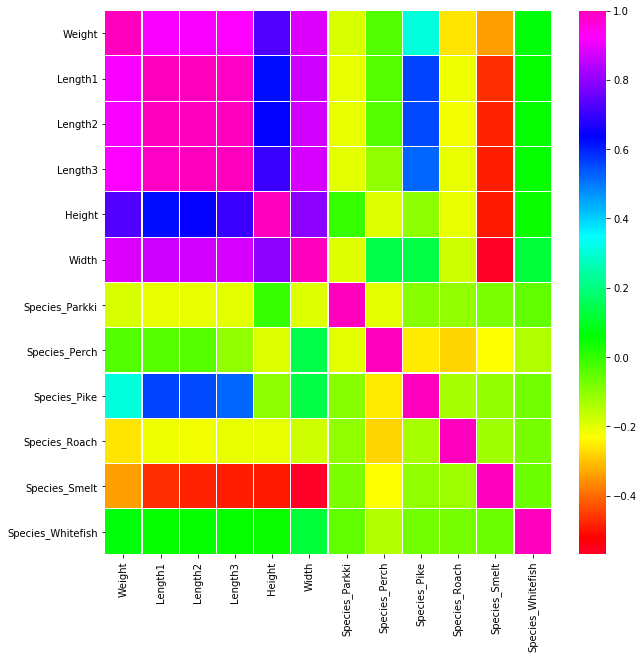

In [68]:

f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr,ax=ax,cmap="gist_rainbow", linewidths=0.1)
plt.show()

In [69]:
pd.set_option("precision",3)
corr.style.background_gradient(cmap="coolwarm")

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
Weight,1.000,0.916,0.919,0.923,0.724,0.887,-0.186,-0.033,0.311,-0.262,-0.337,0.074
Length1,0.916,1.000,1.000,0.992,0.625,0.867,-0.206,-0.038,0.564,-0.213,-0.467,0.051
Length2,0.919,1.000,1.000,0.994,0.640,0.874,-0.206,-0.036,0.553,-0.218,-0.480,0.054
Length3,0.923,0.992,0.994,1.000,0.703,0.879,-0.199,-0.105,0.523,-0.205,-0.488,0.053
Height,0.724,0.625,0.640,0.703,1.000,0.793,-0.001,-0.191,-0.102,-0.202,-0.492,0.049
Width,0.887,0.867,0.874,0.879,0.793,1.000,-0.194,0.144,0.138,-0.171,-0.569,0.124
Species_Parkki,-0.186,-0.206,-0.206,-0.199,-0.001,-0.194,1.000,-0.201,-0.094,-0.103,-0.085,-0.054
Species_Perch,-0.033,-0.038,-0.036,-0.105,-0.191,0.144,-0.201,1.000,-0.255,-0.280,-0.229,-0.146
Species_Pike,0.311,0.564,0.553,0.523,-0.102,0.138,-0.094,-0.255,1.000,-0.131,-0.108,-0.069
Species_Roach,-0.262,-0.213,-0.218,-0.205,-0.202,-0.171,-0.103,-0.280,-0.131,1.000,-0.118,-0.075


[]

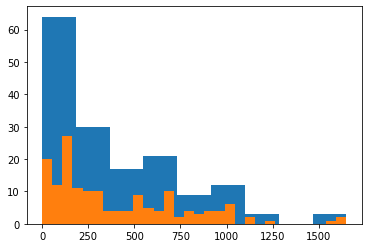

In [70]:

plt.hist(fish1['Weight'], bins="auto")
#sns.distplot(fish1['Weight'])
plt.hist(fish1['Weight'], bins=30)
plt.plot()

[]

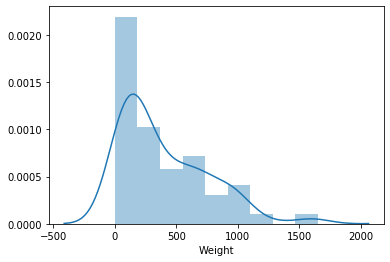

In [71]:
sns.distplot(fish1['Weight'])
plt.plot()

In [85]:
fish1['Weight_log']=np.log1p(fish1["Weight"])
fish1['sqrt_Weight_log']=np.sqrt(fish1["Weight"])

[]

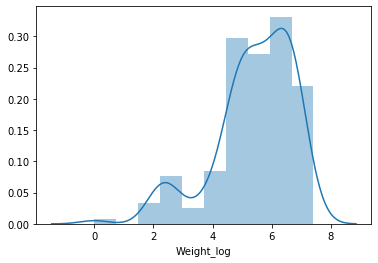

In [86]:
sns.distplot(fish1['Weight_log'], bins=10)  
plt.plot()

[]

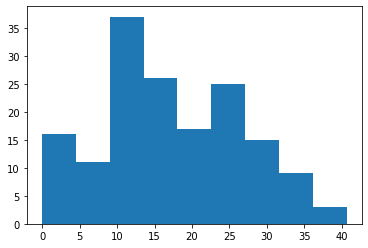

In [76]:
plt.hist(fish1['sqrt_Weight_log'], bins="auto")
plt.plot()

In [77]:
shapiro(fish1["Weight_log"])     ## Ho :Data is Normal ; Ha : Data is not normal.  By shapiro Test

(0.904837429523468, 1.1928044330034027e-08)

In [87]:
stat, pval1=shapiro(fish1["Weight_log"]) 
if pval1<0.05:
    print("We fail to accept Null Hypo as p value {} is very low".format(pval1))
else:
    print("We accept Null Hypo as p value {} is very low".format(pval1))

We fail to accept Null Hypo as p value 1.1928044330034027e-08 is very low


In [80]:
stats,pvalue=shapiro(fish1["sqrt_Weight_log"]) 
if pval1<0.05:
    print("We fail to accept Null Hypo as p value {} is very low".format(pval1))
else:
    print("We accept Null Hypo as p value {} is very low".format(pval1))

We fail to accept Null Hypo as p value 1.1928044330034027e-08 is very low


In [ ]:
## X_train,y_train= Dependent Variable,independent Variable
##X_test,y_test= Dependent Variable,independent Variable

In [108]:
fish1.shape

(159, 14)

In [88]:
fish1.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach',
       'Species_Smelt', 'Species_Whitefish', 'Weight_log', 'sqrt_Weight_log'],
      dtype='object')

In [130]:
y=fish1['Weight_log']
x=fish1[['Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach',
       'Species_Smelt', 'Species_Whitefish','sqrt_Weight_log']]

In [131]:
X_train,X_test, y_train, y_test=train_test_split(x,y, test_size=.20, random_state=4511) 

In [132]:
X_train.shape

(127, 12)

In [133]:
X_test.shape

(32, 12)

In [134]:
y_train

1      5.673
116    6.804
47     5.081
146    2.140
144    7.409
       ...  
61     4.025
51     5.198
94     5.017
120    6.804
12     6.217
Name: Weight_log, Length: 127, dtype: float64

In [135]:
Lin= LinearRegression() 

In [136]:
Lin.fit(X_train,y_train)  # We are training our model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [137]:
#predict
y_train_pred=Lin.predict(X_train)

In [138]:
y_train_pred

array([5.66154332, 6.80841727, 4.99099675, 2.30321672, 7.91656421,
       6.00073607, 4.0106706 , 5.93201678, 5.54071653, 6.42980482,
       6.06740173, 4.25638127, 4.42362449, 6.3755624 , 6.95519575,
       2.28578244, 5.39633838, 5.90389045, 6.47282339, 6.24765413,
       3.87704574, 6.34408237, 6.51854968, 6.64664769, 4.83089988,
       7.24563507, 2.37501237, 4.8370891 , 4.67043813, 5.03311825,
       6.57559317, 6.84472163, 5.16679357, 7.22289638, 7.23717544,
       2.44223591, 4.95744531, 4.91007152, 6.3172529 , 7.32091579,
       5.64000364, 6.28815961, 4.50786629, 4.76507174, 6.42307515,
       6.96983994, 5.10844563, 6.18602522, 6.55710762, 6.24065644,
       5.54448413, 7.39942994, 6.94669002, 2.45076346, 2.41617057,
       5.81455555, 5.06622805, 4.92797846, 7.06961944, 6.88653181,
       2.70844655, 6.16077048, 5.49485823, 5.57111989, 5.61565233,
       4.76533933, 2.38621658, 6.93779584, 6.1758217 , 4.91871501,
       6.4086221 , 6.48920884, 5.36125601, 4.56482343, 6.98653

In [139]:
print("MSE",np.mean(np.square(y_train-y_train_pred))) 

MSE 0.04155483169659213


In [141]:
print("RMSE",np.sqrt(np.mean(np.square(y_train-y_train_pred))))  

RMSE 0.20385002255725196


In [ ]:
##now for test

In [143]:
#predict about test data
y_test_pred=Lin.predict(X_test)

In [144]:
print("MSE",np.mean(np.square(y_test-y_test_pred)))   ##mean square error

MSE 0.8385768299549334


In [145]:
print("RMSE",np.sqrt(np.mean(np.square(y_test-y_test_pred))))  ##root mean square error

RMSE 0.9157384069454187


In [148]:
Lin.intercept_   ##C value

2.2666871191303737

In [150]:
Lin.coef_    ## m value 

array([ 0.17818054, -0.14402349,  0.04604952,  0.08729216,  0.20941784,
        0.11595517,  0.12588696, -0.12941599,  0.08687847, -1.09840568,
        0.35500141, -0.03062233])